# Search Demo

A visual demonstration of some search algorithms used in AI.

* **Uninformed search algorithms**: explore the search space having no information about the problem besides its definition.
* Examples:
    1. Breadth First Search
    2. Depth First Search
    3. Depth Limited Search
    4. Iterative Deepening Search
    5. Uniform Cost Search


* **Informed search algorithms**: explore the search space using some heuristic about the problem in order to efficiently find a solution.
* Examples:
    1. Best First Search
    2. A\* Search
    3. Recursive Best First Search

In [1]:
from search import *

## Setting a problem

Let's say we want to find the shortest path between two Romanian cities, given a map represented as an undirected weighted graph where each node is a city and each weighted edge is a road linking two cities (the edge weight being their distance).

In [2]:
# Undirected weighted graph of cities and their roads and distances.
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

# City locations as (x, y) points.
romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Let's say we want to start exploring from Arad and we want to reach Bucharest. In such case our problem is defined as:

In [3]:
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)

## Viewing the map

In [4]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# For plotting.
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

# For interactivity.
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

import time

We create the weighted graph of Romania using the networkx module. Then we define a function to show this graph.

In [5]:
romania_locations = romania_map.locations

In [6]:
G = nx.Graph()

node_labels = dict()
node_colors = dict()
edge_labels = dict()

for n, p in romania_locations.items():
    G.add_node(n)
    node_labels[n] = n
    node_colors[n] = 'white'

initial_node_colors = dict(node_colors)
    
node_label_pos = {k: [v[0], v[1] - 10] for k, v in romania_locations.items()}

for node in romania_map.nodes():
    connections = romania_map.get(node)

    for connection in connections.keys():
        distance = connections[connection]
        G.add_edge(node, connection)
        edge_labels[(node, connection)] = distance

In [7]:
def show_map(node_colors):
    """Displays the map as a colored graph.
    """
    plt.figure(figsize=(16, 11))

    nx.draw(G, pos=romania_locations,
            node_color=[node_colors[node] for node in G.nodes()])

    node_label_handles = nx.draw_networkx_labels(
        G, pos=node_label_pos, labels=node_labels, font_size=14)

    for label in node_label_handles.values():
        label.set_bbox(dict(facecolor='white', edgecolor='none'))

    nx.draw_networkx_edge_labels(
        G, pos=romania_locations, edge_labels=edge_labels, font_size=14)

    white_circle = lines.Line2D([], [], color='white', marker='o', markersize=15, markerfacecolor='white')
    orange_circle = lines.Line2D([], [], color='white', marker='o', markersize=15, markerfacecolor='orange')
    red_circle = lines.Line2D([], [], color='white', marker='o', markersize=15, markerfacecolor='red')
    gray_circle = lines.Line2D([], [], color='white', marker='o', markersize=15, markerfacecolor='gray')

    plt.legend((white_circle, orange_circle, red_circle, gray_circle),
               ('Unexplored', 'Frontier', 'Being explored', 'Explored'),
               numpoints=1,prop={'size':16}, loc=(.8,.75))

    plt.show()

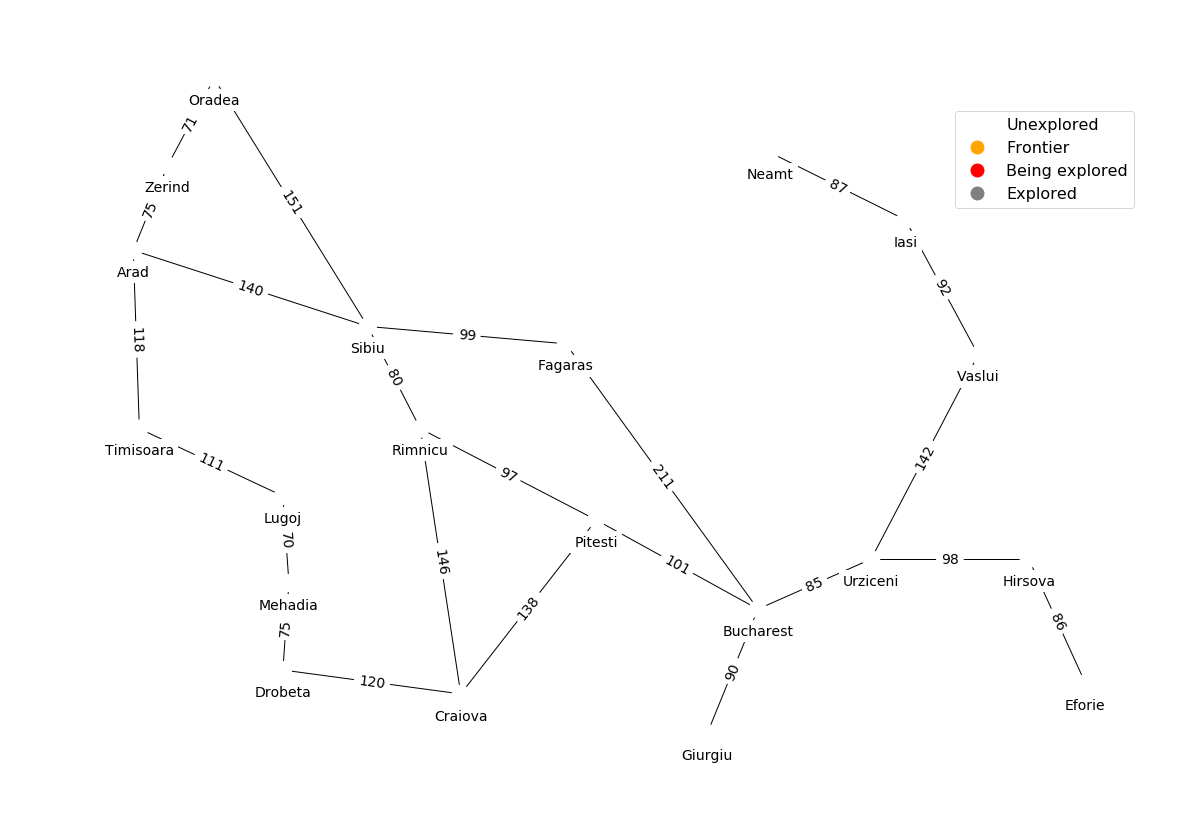

In [8]:
show_map(node_colors)

## Visualizing  the search algorithms

First we define some functions to handle the display of visual elements and the user interactivity.

Since we want to interact with the visuals, some changes had to be done in the implementation of the algorithms.

In [9]:
def final_path_colors(problem, solution):
    """Returns a dict in which nodes from the solution path have the green color.
    """
    final_colors = dict(initial_node_colors)
    final_colors[problem.initial] = 'green'
    for node in solution:
        final_colors[node] = 'green'
    return final_colors

In [10]:
def display_visual(user_input, algorithm=None, problem=None):
    """Controls visual elements and user interactions.
    """
    if user_input == False:
        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False

                global all_node_colors

                iterations, all_node_colors, node=algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))

                slider.max = len(all_node_colors) - 1

                for i in range(slider.max + 1):
                    slider.value = i

        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)

        button = widgets.ToggleButton(value=False)
        button_visual = widgets.interactive(visualize_callback, Visualize=button)
        display(button_visual)

    if user_input == True:
        node_colors = dict(initial_node_colors)
        if algorithm == None:
            algorithms = {
                'Breadth-First Search': breadth_first_search,
                'Depth-First Tree Search': depth_first_search,
                'Uniform Cost Search': uniform_cost_search,
                'A* Search': astar_search,
            }
            algo_dropdown = widgets.Dropdown(description='Search algorithm: ',
                                             options=sorted(list(algorithms.keys())),
                                             value='Breadth-First Search')
            display(algo_dropdown)

        def slider_callback(iteration):
            try:
                show_map(all_node_colors[iteration])
            except:
                pass

        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False

                problem = GraphProblem(start_dropdown.value, end_dropdown.value, romania_map)
                global all_node_colors

                if algorithm == None:
                    user_algorithm = algorithms[algo_dropdown.value]

                iterations, all_node_colors, node = user_algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))

                slider.max = len(all_node_colors) - 1

                for i in range(slider.max + 1):
                    slider.value = i

        start_dropdown = widgets.Dropdown(description='Start city: ',
                                          options=sorted(list(node_colors.keys())),
                                          value='Arad')
        display(start_dropdown)

        end_dropdown = widgets.Dropdown(description='Goal city: ',
                                        options=sorted(list(node_colors.keys())),
                                        value='Fagaras')
        display(end_dropdown)

        button = widgets.ToggleButton(value=False)
        button_visual = widgets.interactive(visualize_callback, Visualize=button)
        display(button_visual)

        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration=slider)
        display(slider_visual)

### Breadth-First Search (modified)

In [11]:
def graph_search(problem, frontier):
    """Basic graph search algorithm.
    """
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)

    node = Node(problem.initial)
    node_colors[node.state] = 'red'
    iterations += 1
    all_node_colors.append(dict(node_colors))

    if problem.goal_test(node.state):
        node_colors[node.state] = 'green'
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return iterations, all_node_colors, node

    frontier.append(node)
    node_colors[node.state] = 'orange'
    iterations += 1
    all_node_colors.append(dict(node_colors))

    explored = set()
    while frontier:
        node = frontier.pop()
        node_colors[node.state] = 'red'
        iterations += 1
        all_node_colors.append(dict(node_colors))

        explored.add(node.state)

        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = 'green'
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return iterations, all_node_colors, child

                frontier.append(child)
                node_colors[child.state] = 'orange'
                iterations += 1
                all_node_colors.append(dict(node_colors))

        node_colors[node.state] = 'gray'
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [12]:
def breadth_first_search(problem):
    """Searches the shallowest nodes in the search graph first.
    """
    return graph_search(problem, FIFOQueue())

In [13]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(user_input=False, algorithm=breadth_first_search, problem=romania_problem)

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


The Breadth-First Search algorithm took **21** iterations to find a solution.

This solution has a total cost of 140 + 99 + 211 = **450**.

### Depth-First Search (modified)

In [14]:
def depth_first_search(problem):
    """Searches the deepest nodes in the search graph first.
    """
    return graph_search(problem, Stack())

In [15]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(user_input=False, algorithm=depth_first_search, problem=romania_problem)

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


The Depth-First Search algorithm took **25** iterations to find a solution.

This solution has a total cost of 118 + 111 + 70 + 75 + 120 + 138 + 101 = **733**.

### Uniform Cost Search (modified)

In [16]:
def best_first_graph_search(problem, f):
    """Searches the nodes with lower costs in the search graph first.
    """
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)

    f = memoize(f, 'f')
    node = Node(problem.initial)
    node_colors[node.state] = 'red'
    iterations += 1
    all_node_colors.append(dict(node_colors))

    if problem.goal_test(node.state):
        node_colors[node.state] = 'green'
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return iterations, all_node_colors, node

    frontier = PriorityQueue(min, f)
    frontier.append(node)
    node_colors[node.state] = 'orange'
    iterations += 1
    all_node_colors.append(dict(node_colors))

    explored = set()
    while frontier:
        node = frontier.pop()
        node_colors[node.state] = 'red'
        iterations += 1
        all_node_colors.append(dict(node_colors))

        if problem.goal_test(node.state):
            node_colors[node.state] = 'green'
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return iterations, all_node_colors, node

        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = 'orange'
                iterations += 1
                all_node_colors.append(dict(node_colors))

            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = 'orange'
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = 'gray'
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [17]:
def uniform_cost_search(problem):
    """Searches the nodes with lower path costs in the search graph first.
    """
    return best_first_graph_search(problem, lambda node: node.path_cost)

In [18]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(user_input=False, algorithm=uniform_cost_search, problem=romania_problem)

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


The Uniform Cost Search algorithm took **41** iterations to find a solution.

This solution has a total cost of 140 + 80 + 97 + 101 = **418**.

### A\* Search

Note: the heuristic function h(n) is by default the straight-line distance from a node's state to the goal state, as defined in **`search.GraphProblem`** class.

In [19]:
def astar_search(problem, h=None):
    """A* heuristic search algorithm. It uses a heuristic function h which
    estimates the lowest cost from the current node to a goal node.
    """
    h = memoize(h or problem.h, 'h')
    return best_first_graph_search(problem, lambda n: n.path_cost + h(n))

In [20]:
all_node_colors = []
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
display_visual(user_input=False, algorithm=astar_search, problem=romania_problem)

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


The Uniform Cost Search algorithm took **24** iterations to find a solution.

This solution has a total cost of 140 + 80 + 97 + 101 = **418**.

**Conclusion**: the A\* search algorithm had the best performance considering the trade-off between efficiency (finding a solution with less iterations) and effectiveness (finding a solution with the lowest cost). Uniform Cost search was effective, but not very efficient. Breadth-First search was efficient, but not effective. Depth-First search was neither efficient nor effective.

## General search app

Below there is a simple app that uses the algorithms above to find a path linking any pair of Romanian cities in the graph. The user can choose the starting point, the destination and the search algorithm.

In [21]:
all_node_colors = []
display_visual(user_input=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.
